In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
# import "Dataset prediction USDCNY.xlsx"
files.upload()

Saving Dataset prediction USDCNY.xlsx to Dataset prediction USDCNY.xlsx


{'Dataset prediction USDCNY.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00t6Z\xa6z\x01\x00\x00\x84\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [ ]:
# read the data
df = pd.read_excel('Dataset prediction USDCNY.xlsx')

In [ ]:
# show the dataset
df.head()

,Date,USD/CNY - US Dollar Chinese Yuan,DY (endogenous in first difference),Direction,S&P 500 Index,SSE Composite Index,GDP Growth Differential (US - China in %),USA Interest Rate,China Interest Rate
0,2015-01-01,6.2495,NaN,NaN,1994.99,3210.36,-3.5,0.11,5.3
1,2015-02-01,6.2695,0.003200,Up,2104.50,3310.30,-3.5,0.11,5.3
2,2015-03-01,6.1990,-0.011245,Down,2067.89,3747.90,-3.5,0.11,5.3
3,2015-04-01,6.2018,0.000452,Up,2085.51,4441.66,-4.6,0.12,5.3
4,2015-05-01,6.1980,-0.000613,Down,2107.39,4611.74,-4.6,0.12,5.3


In [ ]:
# permanently drop 'Date' as it is not a feature
df.drop('Date', axis=1, inplace=True)

In [ ]:
# show the dataset
df.head()

,USD/CNY - US Dollar Chinese Yuan,DY (endogenous in first difference),Direction,S&P 500 Index,SSE Composite Index,GDP Growth Differential (US - China in %),USA Interest Rate,China Interest Rate
0,6.2495,NaN,NaN,1994.99,3210.36,-3.5,0.11,5.3
1,6.2695,0.003200,Up,2104.50,3310.30,-3.5,0.11,5.3
2,6.1990,-0.011245,Down,2067.89,3747.90,-3.5,0.11,5.3
3,6.2018,0.000452,Up,2085.51,4441.66,-4.6,0.12,5.3
4,6.1980,-0.000613,Down,2107.39,4611.74,-4.6,0.12,5.3


In [ ]:
# "isnull" identifies missing values
# the first "sum()" calculates the total number of missing values per column
# the second "sum()" calculates the total number of missing values per row
df.isnull().sum().sum()

np.int64(1)

In [ ]:
# since there can be multiple modes,
# [0] selects the first mode in the list,
# [1] selects the second mode, and so forth.
df['Direction'].fillna(value=df['Direction'].mode()[0])

,Direction
0,Down
1,Up
2,Down
3,Up
4,Down
...,...
115,Down
116,Up
117,Up
118,Up


In [ ]:
mode_value = df['Direction'].mode()[0] if not df['Direction'].mode().empty else 'Up'

In [ ]:
df['Direction'] = df['Direction'].fillna(value=mode_value)

In [ ]:
# "fill" is used for imputation
# "na" is used to indicate missing values
# "DY (endogenous in first difference)" is the name of the variable
# "median" can be used instead of "mean"
df['DY (endogenous in first difference)'].fillna(value=df['DY (endogenous in first difference)'].mean())

,DY (endogenous in first difference)
0,0.001406
1,0.003200
2,-0.011245
3,0.000452
4,-0.000613
...,...
115,-0.017910
116,-0.010212
117,0.014278
118,0.017491


In [ ]:
# for quick descriptive statistics
df['GDP Growth Differential (US - China in %)'].describe()

,GDP Growth Differential (US - China in %)
count,120.000000
mean,-3.117500
std,7.395861
min,-31.300000
25%,-4.625000
50%,-3.550000
75%,-1.700000
max,30.300000


In [ ]:
df['SSE Composite Index'].describe()

,SSE Composite Index
count,120.00000
mean,3183.78075
std,325.51497
min,2493.90000
25%,2976.13000
50%,3164.03500
75%,3349.64500
max,4611.74000


In [ ]:
df['USD/CNY - US Dollar Chinese Yuan'].describe()

,USD/CNY - US Dollar Chinese Yuan
count,120.000000
mean,6.756899
std,0.318731
min,6.198000
25%,6.473000
50%,6.763750
75%,7.020900
max,7.315800


In [ ]:
df['S&P 500 Index'].describe()

,S&P 500 Index
count,120.000000
mean,3365.555250
std,1094.236322
min,1920.030000
25%,2458.577500
50%,3008.970000
75%,4184.327500
max,6032.380000


In [ ]:
df['DY (endogenous in first difference)'].describe()

,DY (endogenous in first difference)
count,119.000000
mean,0.001406
std,0.014264
min,-0.034152
25%,-0.008174
50%,0.000666
75%,0.009699
max,0.042386


In [ ]:
df['USA Interest Rate'].describe()

,USA Interest Rate
count,120.000000
mean,1.782583
std,1.873314
min,0.050000
25%,0.127500
50%,1.155000
75%,2.402500
max,5.330000


In [ ]:
df['China Interest Rate'].describe()

,China Interest Rate
count,120.000000
mean,4.039250
std,0.455224
min,3.100000
25%,3.700000
50%,4.150000
75%,4.300000
max,5.300000


In [ ]:
df['Direction'].describe()

,Direction
count,120
unique,2
top,Down
freq,62


In [ ]:
#STEP 4. DATA TRANSFORMATION
# data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   USD/CNY - US Dollar Chinese Yuan           120 non-null    float64
 1   DY (endogenous in first difference)        119 non-null    float64
 2   Direction                                  120 non-null    object 
 3   S&P 500 Index                              120 non-null    float64
 4   SSE Composite Index                        120 non-null    float64
 5   GDP Growth Differential (US - China in %)  120 non-null    float64
 6   USA Interest Rate                          120 non-null    float64
 7   China Interest Rate                        120 non-null    float64
dtypes: float64(7), object(1)
memory usage: 7.6+ KB


In [ ]:
# change the target type
df['Direction'] = df['Direction'].astype('category')

In [ ]:
# updated data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   USD/CNY - US Dollar Chinese Yuan           120 non-null    float64 
 1   DY (endogenous in first difference)        119 non-null    float64 
 2   Direction                                  120 non-null    category
 3   S&P 500 Index                              120 non-null    float64 
 4   SSE Composite Index                        120 non-null    float64 
 5   GDP Growth Differential (US - China in %)  120 non-null    float64 
 6   USA Interest Rate                          120 non-null    float64 
 7   China Interest Rate                        120 non-null    float64 
dtypes: category(1), float64(7)
memory usage: 6.9 KB


In [ ]:
#STEP 5. DATA SPLITTING
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop('Direction',axis=1)
y = df['Direction']

In [ ]:
x = df.drop(columns=['Direction', 'USD/CNY - US Dollar Chinese Yuan', 'DY (endogenous in first difference)'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [ ]:
#STEP 6. DT ALGORITHM
# import necessary libraries
from sklearn.tree import DecisionTreeClassifier

# model building
# for "max_depth", we chose 3 as we have have 5 features
dtree = DecisionTreeClassifier(max_depth = 3)

# model training
dtree.fit(x_train,y_train)

# prediction generation
y_pred = dtree.predict(x_test)

In [ ]:
# STEP 7. PERFORMANCE MEASURE
# import necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# print performance metrics
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[ 8  6]
 [16  6]]


              precision    recall  f1-score   support

        Down       0.33      0.57      0.42        14
          Up       0.50      0.27      0.35        22

    accuracy                           0.39        36
   macro avg       0.42      0.42      0.39        36
weighted avg       0.44      0.39      0.38        36



In [ ]:
# STEP 8. TREE VISUALIZATION
# import necessary libraries
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
# class labels
y.unique()

['Down', 'Up']
Categories (2, object): ['Down', 'Up']

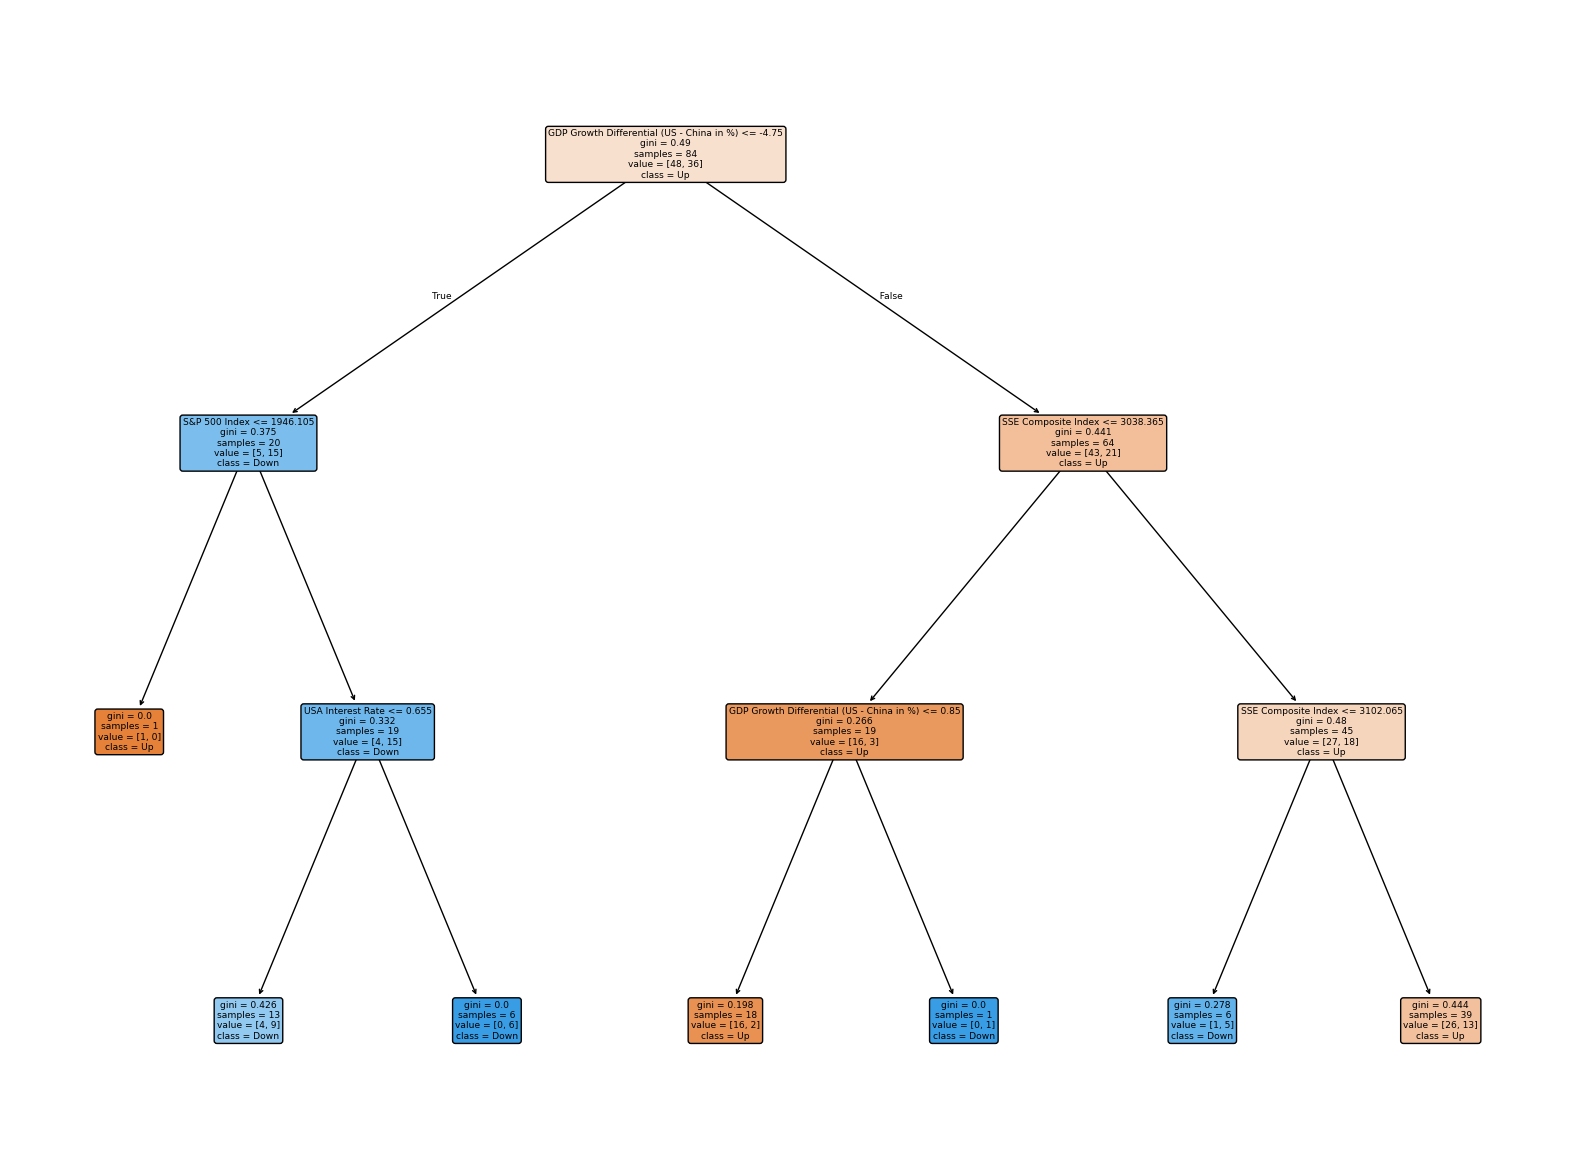

In [ ]:
# plot the decision tree
plt.figure(figsize=(20,15))

# tree characteristics
tree.plot_tree(dtree,
               feature_names = x.columns,
               class_names=['Up', 'Down'],
               rounded=True,
               filled = True);

In [ ]:
#RF ALGORITHM
# import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# model building
rf = RandomForestClassifier(n_estimators=100)

# model training
rf.fit(x_train, y_train)

# prediction generation
y_pred = rf.predict(x_test)

In [ ]:
# import necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# print performance metrics
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[ 7  7]
 [15  7]]


              precision    recall  f1-score   support

        Down       0.32      0.50      0.39        14
          Up       0.50      0.32      0.39        22

    accuracy                           0.39        36
   macro avg       0.41      0.41      0.39        36
weighted avg       0.43      0.39      0.39        36

